In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root")
f.cd()
f.ls()

TFile**		./newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root	
 TFile*		./newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root	
  KEY: TH3D	corrected;1	corrected


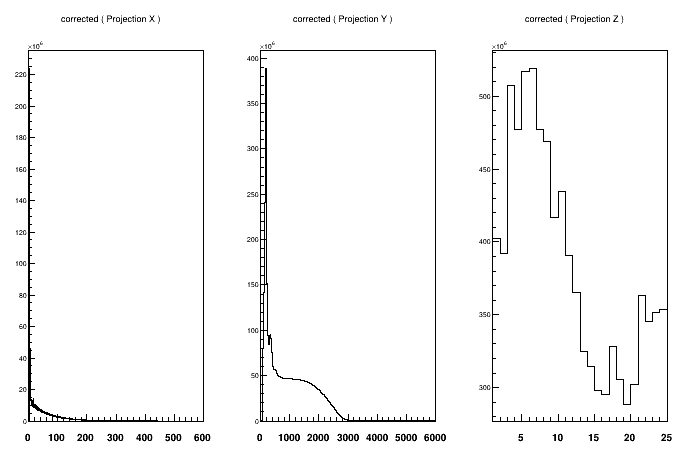

In [3]:
c = r.TCanvas()
c.Divide(3,1)
c.cd(1)
timehist = f.corrected.ProjectionX() #time (us)
timehist.Draw()
c.cd(2)
energyhist = f.corrected.ProjectionY() #energy (MeV)
energyhist.Draw()
c.cd(3)
calohist = f.corrected.ProjectionZ() # calonum
calohist.Draw()
c.Draw()

In [4]:
nbins = calohist.GetXaxis().GetNbins()
calolist = []
for i in range(0,nbins):
    ding = int(calohist.GetBinCenter(i) + calohist.GetBinWidth(i)/2)
    calolist.append(ding)
print(calolist)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


[<ROOT.TH1D object ("px_cut") at 0x7fffdb9f37c0>, <ROOT.TH1D object ("px_cut") at 0x7fffdb9f5b60>, <ROOT.TH1D object ("px_cut") at 0x7fffdba0d1e0>, <ROOT.TH1D object ("px_cut") at 0x7fffdb9d6580>, <ROOT.TH1D object ("px_cut") at 0x7fffdba0e5c0>, <ROOT.TH1D object ("px_cut") at 0x7fffdb9f3c40>, <ROOT.TH1D object ("px_cut") at 0x7fffdb9f40a0>, <ROOT.TH1D object ("px_cut") at 0x7fffdb9fd880>, <ROOT.TH1D object ("px_cut") at 0x7fffdb9fdce0>, <ROOT.TH1D object ("px_cut") at 0x7fffdb9fae00>, <ROOT.TH1D object ("px_cut") at 0x7fffdb9fb260>, <ROOT.TH1D object ("px_cut") at 0x7fffdba083b0>, <ROOT.TH1D object ("px_cut") at 0x7fffdba08810>, <ROOT.TH1D object ("px_cut") at 0x7fffdb9d7e60>, <ROOT.TH1D object ("px_cut") at 0x7fffdb9d82c0>, <ROOT.TH1D object ("px_cut") at 0x7fffdba0ecd0>, <ROOT.TH1D object ("px_cut") at 0x7fffdba0f130>, <ROOT.TH1D object ("px_cut") at 0x7fffdba0d800>, <ROOT.TH1D object ("px_cut") at 0x7fffdba0dc60>, <ROOT.TH1D object ("px_cut") at 0x7fffdb9d54a0>, <ROOT.TH1D object (

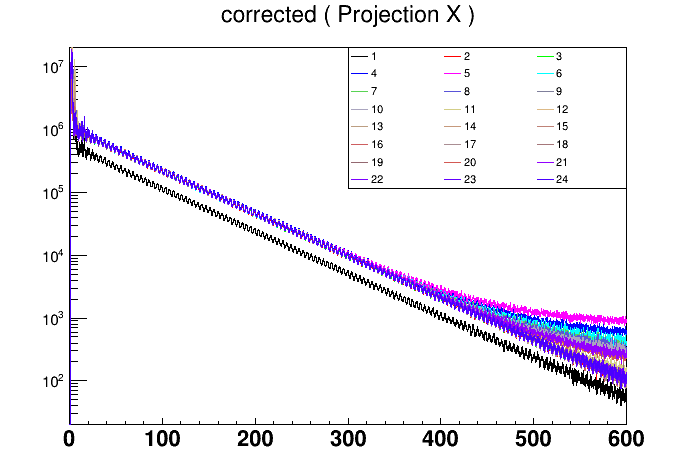

In [5]:
singleCaloEnergyList = []
c = r.TCanvas()
c.SetLogy()
leg = r.TLegend(0.5,0.6,0.9,0.9)
leg.SetNColumns(3)
for i in range(0,len(calolist)):
    h2 = f.corrected.ProjectionX("px_cut",0,-1,i,i+1,"")
    h2.SetLineColor(i+1)
    if i >= 4:
        h2.SetLineColor(2+i)
    if i>= 8:
        h2.SetLineColor(31+i)
    ding = h2.Clone()
    if i == 0:
        ding.Draw()
    else:
        ding.Draw("SAME")
    singleCaloEnergyList.append(ding)
print(singleCaloEnergyList)
for i in range(0,len(singleCaloEnergyList)):
    leg.AddEntry(singleCaloEnergyList[i],str(calolist[i]),"l")
leg.Draw("SAME")
c.Draw()

In [6]:
for j in range(0,600,200):
    energylistj = []
    for i in range(0, len(singleCaloEnergyList)):
        energybin = singleCaloEnergyList[i].FindBin(j)
        ding = singleCaloEnergyList[i].GetBinContent(energybin)
        energylistj.append(ding)
#    print(energylistj)
    plt.plot(energylistj)
    plt.title(str(j)+" Microseconds")
    plt.ylabel('# of Counts')
    plt.xlabel('Calorimeter Number - 1')
#    plt.show()
    plt.savefig('./caloEnergyTime/'+str(format(j,'0>3'))+'_noCut.png', bbox_inches='tight')
    plt.close()

In [7]:
print(energylistj)

[1226.0310276142197, 2207.0507683243245, 2254.053058848519, 2981.0928769930815, 3202.1051136802075, 2696.0750576505116, 2665.0733223231914, 2667.073324823668, 2460.061719417185, 2568.067523443638, 2407.0597063207006, 2260.052154249468, 2314.055248980515, 2355.0571016029644, 2309.0543494802437, 2287.052959159597, 2312.0541869154868, 2377.0580117587474, 2450.061439509188, 2582.0693957440317, 2564.0686773151315, 2286.053925232647, 2297.0541786377144, 2401.059137419099]


Now lets look at what happens when we introduce an energy cut into the mix.

[<ROOT.TH1D object ("px_cut") at 0x7fffdbafe560>, <ROOT.TH1D object ("px_cut") at 0x7fffdbdeb0d0>, <ROOT.TH1D object ("px_cut") at 0x7fffdbafb100>, <ROOT.TH1D object ("px_cut") at 0x7fffdbafb4f0>, <ROOT.TH1D object ("px_cut") at 0x7fffdbafb8e0>, <ROOT.TH1D object ("px_cut") at 0x7fffdbca4fe0>, <ROOT.TH1D object ("px_cut") at 0x7fffdbca53d0>, <ROOT.TH1D object ("px_cut") at 0x7fffdbca57c0>, <ROOT.TH1D object ("px_cut") at 0x7fffdbca5bb0>, <ROOT.TH1D object ("px_cut") at 0x7fffdbe76f10>, <ROOT.TH1D object ("px_cut") at 0x7fffdbe77300>, <ROOT.TH1D object ("px_cut") at 0x7fffdbe776f0>, <ROOT.TH1D object ("px_cut") at 0x7fffdbe77ae0>, <ROOT.TH1D object ("px_cut") at 0x7fffdbe77ed0>, <ROOT.TH1D object ("px_cut") at 0x7fffdbe782c0>, <ROOT.TH1D object ("px_cut") at 0x7fffdbe786b0>, <ROOT.TH1D object ("px_cut") at 0x7fffdbe78aa0>, <ROOT.TH1D object ("px_cut") at 0x7fffdbe78e90>, <ROOT.TH1D object ("px_cut") at 0x7fffdbe79280>, <ROOT.TH1D object ("px_cut") at 0x7fffdbe79670>, <ROOT.TH1D object (

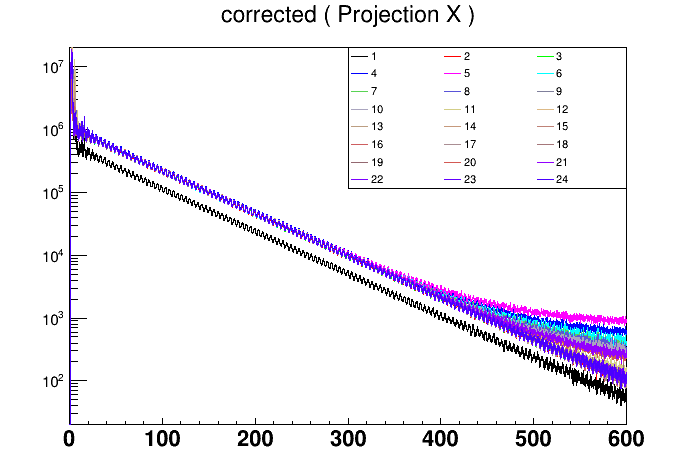

In [8]:
singleCaloEnergyCutList = []
c = r.TCanvas()
c.SetLogy()
leg = r.TLegend(0.5,0.6,0.9,0.9)
leg.SetNColumns(3)
for i in range(0,len(calolist)):
    h2 = f.corrected.ProjectionX("px_cut",1500,3000,i,i+1,"")
    h2.SetLineColor(i+1)
    if i >= 4:
        h2.SetLineColor(2+i)
    if i>= 8:
        h2.SetLineColor(31+i)
    ding = h2.Clone()
    if i == 0:
        ding.Draw()
    else:
        ding.Draw("SAME")
    singleCaloEnergyCutList.append(ding)
print(singleCaloEnergyCutList)
for i in range(0,len(singleCaloEnergyCutList)):
    leg.AddEntry(singleCaloEnergyCutList[i],str(calolist[i]),"l")
leg.Draw("SAME")
c.Draw()

In [9]:
for j in range(0,600,200):
    energylistj = []
    for i in range(0, len(singleCaloEnergyCutList)):
        energybin = singleCaloEnergyCutList[i].FindBin(j)
        ding = singleCaloEnergyCutList[i].GetBinContent(energybin)
        energylistj.append(ding)
    plt.plot(energylistj)
    plt.title(str(j)+" Microseconds")
    plt.ylabel('# of Counts')
    plt.xlabel('Calorimeter Number - 1')
#    plt.show()
    plt.savefig('./caloEnergyTime/'+str(format(j,'0>3'))+'_cut.png', bbox_inches='tight')
    plt.close()

Now we can create a comparison plot which shows the cut and uncut plots side by side

In [10]:
for j in range(0,600,2):
    energylistj = []
    energylistjuncut = []
    for i in range(0, len(singleCaloEnergyCutList)):
        energybin = singleCaloEnergyCutList[i].FindBin(j)
        ding = singleCaloEnergyCutList[i].GetBinContent(energybin)
        energylistj.append(ding)
    for i in range(0, len(singleCaloEnergyList)):
        energybin = singleCaloEnergyList[i].FindBin(j)
        ding = singleCaloEnergyList[i].GetBinContent(energybin)
        energylistjuncut.append(ding)
    plt.plot(energylistj)
    plt.plot(energylistjuncut,linestyle='dashed')
#    print(energylistjuncut)
#    print(energylistj)
    plt.title(str(j)+" Microseconds")
    plt.ylabel('# of Counts')
    plt.xlabel('Calorimeter Number - 1')
#    plt.show()
    plt.savefig('./caloEnergyTime/'+str(format(j,'0>3'))+'_combined.png', bbox_inches='tight')
    plt.close()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4273066.462491664, 13543389.68394732, 21738610.528021883, 21071062.88423999, 22422560.003223937, 28089178.827171136, 23073064.23343909, 16011502.46841106, 12205830.392604768, 9428442.107803896, 7401439.198416869, 4921227.522867264, 3287811.3290000386, 2555973.0299522975, 2358847.849335475, 2301334.898512162, 3524451.3063962185, 3883452.429290942, 2749103.8211871777, 2847742.499913236, 6734523.358641929, 9566623.24538679, 9142537.129396075, 8430072.65840249]
[4273066.462491664, 13543389.68394732, 21738610.528021883, 21071062.88423999, 22422560.003223937, 28089178.827171136, 23073064.23343909, 16011502.46841106, 12205830.392604768, 9428442.107803896, 7401439.198416869, 4921227.522867264, 3287811.3290000386, 2555973.0299522975, 2358847.849335475, 230